# Visualize Generator Outputs

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt

from torchgan.models import DCGANGenerator
from torch import nn
import torch

import numpy as np

import utils

### Load in the parameters 

In [11]:
GAN_PARAMS_TO_LOAD = 'gan0.model'
GAN_CKPT_PATH = f'./model/{GAN_PARAMS_TO_LOAD}'

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load the meme background generator
generator_state_dict = torch.load(
    GAN_CKPT_PATH,
    map_location=torch.device(device)
)['generator']

generator = DCGANGenerator(
    encoding_dims=100,
    out_size=64,
    out_channels=3,
    step_channels=64,
    nonlinearity=nn.LeakyReLU(0.2),
    last_nonlinearity=nn.Tanh(),
).to(device).eval()

generator.load_state_dict(
    state_dict=generator_state_dict
)

<All keys matched successfully>

### Now we sample!

In [14]:
NUM_SAMPLES = 64

# normal
noise = generator.sampler(NUM_SAMPLES, device)[0]

# truncated normal
# noise = torch.fmod(torch.randn(NUM_SAMPLES, generator.encoding_dims),2)

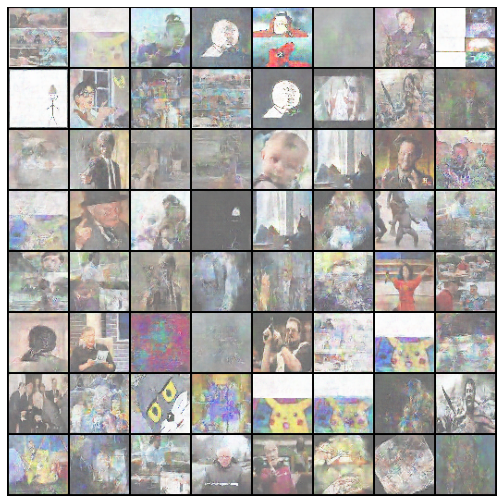

In [15]:
img = utils.tensor_to_image(generator(noise), ncol=8)

figure = plt.figure(figsize=(9, 9))
plt.imshow(np.asarray(img))
plt.axis('off')
plt.show()

#### We can (linearly) interpolate between two points in Z-space

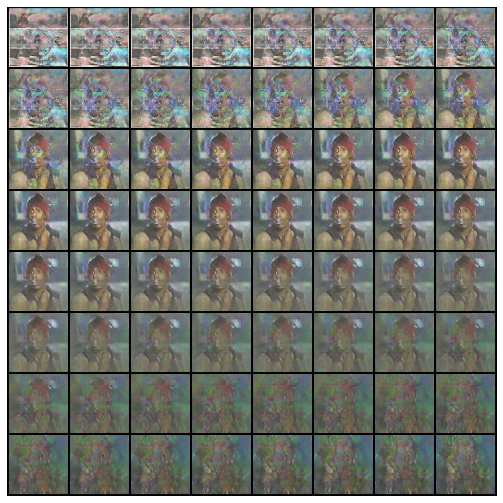

In [17]:
interpolated_noise = utils.interpolate(noise[0], noise[63])  # just two random start, end points

img = utils.tensor_to_image(generator(interpolated_noise), ncol=8)

figure = plt.figure(figsize=(9, 9))
plt.imshow(np.asarray(img))
plt.axis('off')
plt.show()

#### Viewing a single output (woah!)

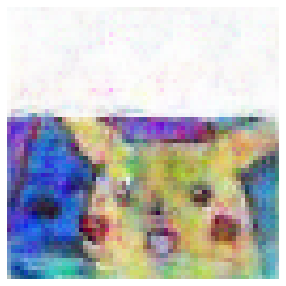

In [40]:
out = generator(noise)[46]
img = utils.tensor_to_image(out, ncol=1, padding=0)

plt.figure(figsize=(5,5))
plt.imshow(np.asarray(img))
plt.axis('off')
plt.show()

In [44]:
np.asarray(img).shape

(64, 64, 3)